In [1]:
# Import data from Excel sheet
import pandas as pd
df = pd.read_excel('ADNI combined.xlsx', sheet_name='sample')
#print(df)
sid = df['RID']
grp = df['Group at scan date (1=CN, 2=EMCI, 3=LMCI, 4=AD, 5=SMC)']
age = df['Age at scan']
sex = df['Sex (1=female)']
tiv = df['TIV']
field = df['MRI_Field_Strength']
grpbin = (grp > 1) # 1=CN, ...

In [2]:
# Scan for nifti file names
import glob
#dataAD = sorted(glob.glob('mwp1_MNI/AD/*.nii.gz'))
#dataLMCI = sorted(glob.glob('mwp1_MNI/LMCI/*.nii.gz'))
#dataCN = sorted(glob.glob('mwp1_MNI/CN/*.nii.gz'))
dataADNI3 = sorted(glob.glob('mwp1_MNI/ADNI3/*.nii.gz'))
dataFiles = dataADNI3 #dataAD + dataLMCI + dataCN + dataADNI3
numfiles = len(dataFiles)
print('Found ', str(numfiles), ' nifti files')

Found  575  nifti files


In [3]:
# Match covariate information
import re
debug = False
cov_idx = [-1] * numfiles # list; array: np.full((numfiles, 1), -1, dtype=int)
print('Matching covariates for loaded files ...')
for i,id in enumerate(sid):
  p = [j for j,x in enumerate(dataFiles) if re.search('_%04d_' % id, x)] # translate ID numbers to four-digit numbers, get both index and filename
  if len(p)==0:
    if debug: print('Did not find %04d' % id) # did not find Excel sheet subject ID in loaded file selection
  else:
    if debug: print('Found %04d in %s: %s' % (id, p[0], dataFiles[p[0]]))
    cov_idx[p[0]] = i # store Excel index i for data file index p[0]
print('Checking for scans not found in Excel sheet: ', sum(x<0 for x in cov_idx))

labels = pd.DataFrame({'Group':grpbin}).iloc[cov_idx, :]
grps = pd.DataFrame({'Group':grp, 'RID':sid}).iloc[cov_idx, :]

Matching covariates for loaded files ...
Checking for scans not found in Excel sheet:  0


In [4]:
# Load residualized data from disk
import h5py
import numpy as np
from pandas import DataFrame
from keras.utils import to_categorical
hf = h5py.File('orig_images_wb_mwp1_MNI_ADNI3.hdf5', 'r')
hf.keys # read keys
#labels = np.array(hf.get('labels')) # note: was of data frame type before
images = np.array(hf.get('images'))
hf.close()
labels = to_categorical(np.asarray(labels)) # use grps to access original labels
print(images.shape)

Using TensorFlow backend.


(575, 100, 100, 120, 1)


In [5]:
# specify version of tensorflow
#%tensorflow_version 1.x
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# disable tensorflow deprecation warnings
import logging
logging.getLogger('tensorflow').disabled=True
# downgrade to specific version
#!pip install tensorflow-gpu==1.15
#import tensorflow as tf
#print(tf.__version__)
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = False #True
session = tf.Session(config=config)
set_session(session)

1.15.0


validating model newmodel_rawdata_pretrained/newmodel_wb_cv1.hdf5
Test accuracy: 61.22 %


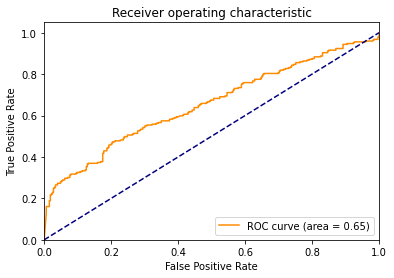

Optimal prediction threshold: 0.93648
Optimal prediction threshold: 0.99238
AUC for MCI vs. CN = 0.59
AUC for AD vs. CN = 0.84
AUC for MCI vs. CN = 0.591
AUC for AD vs. CN = 0.845
Acc for MCI vs. CN = 58.3
Acc for AD vs. CN = 67.5
confusion matrix (naive)
[[209 117]
 [  0   0]
 [ 97  90]
 [  9  53]]
oAcc for MCI vs. CN = 63.9
oAcc for AD vs. CN = 84.0
confusion matrix (optimized)
[[259  67]
 [  0   0]
 [118  69]
 [ 14  48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv2.hdf5
Test accuracy: 70.61 %


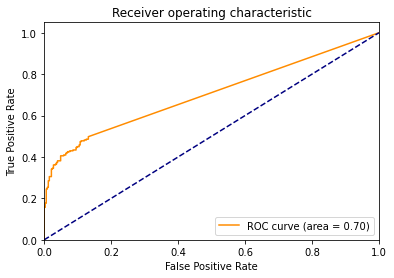

Optimal prediction threshold: 0.32636
Optimal prediction threshold: 0.39835
AUC for MCI vs. CN = 0.63
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.635
AUC for AD vs. CN = 0.906
Acc for MCI vs. CN = 69.4
Acc for AD vs. CN = 89.7
confusion matrix (naive)
[[298  28]
 [  0   0]
 [129  58]
 [ 12  50]]
oAcc for MCI vs. CN = 68.8
oAcc for AD vs. CN = 88.4
confusion matrix (optimized)
[[283  43]
 [  0   0]
 [117  70]
 [  9  53]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv3.hdf5
Test accuracy: 60.70 %


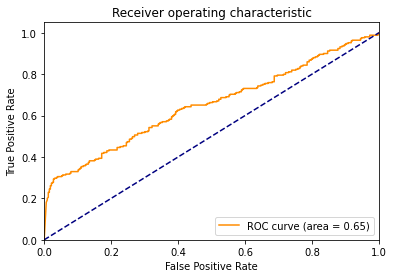

Optimal prediction threshold: 0.99987
Optimal prediction threshold: 0.99973
AUC for MCI vs. CN = 0.57
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.573
AUC for AD vs. CN = 0.886
Acc for MCI vs. CN = 57.3
Acc for AD vs. CN = 67.0
confusion matrix (naive)
[[205 121]
 [  0   0]
 [ 98  89]
 [  7  55]]
oAcc for MCI vs. CN = 67.4
oAcc for AD vs. CN = 90.5
confusion matrix (optimized)
[[313  13]
 [  0   0]
 [154  33]
 [ 20  42]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv4.hdf5
Test accuracy: 63.13 %


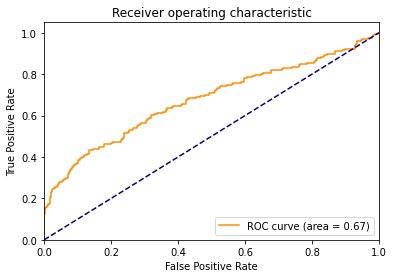

Optimal prediction threshold: 0.98044
Optimal prediction threshold: 0.96740
AUC for MCI vs. CN = 0.61
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.607
AUC for AD vs. CN = 0.879
Acc for MCI vs. CN = 59.6
Acc for AD vs. CN = 67.5
confusion matrix (naive)
[[205 121]
 [  0   0]
 [ 86 101]
 [  5  57]]
oAcc for MCI vs. CN = 67.4
oAcc for AD vs. CN = 84.3
confusion matrix (optimized)
[[287  39]
 [  0   0]
 [128  59]
 [ 20  42]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv5.hdf5
Test accuracy: 62.96 %


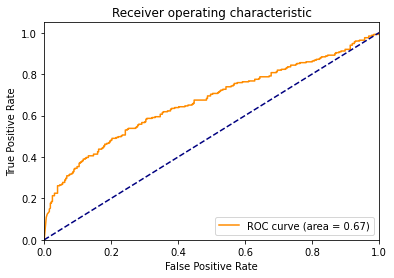

Optimal prediction threshold: 0.88585
Optimal prediction threshold: 0.99545
AUC for MCI vs. CN = 0.60
AUC for AD vs. CN = 0.86
AUC for MCI vs. CN = 0.604
AUC for AD vs. CN = 0.861
Acc for MCI vs. CN = 59.8
Acc for AD vs. CN = 67.8
confusion matrix (naive)
[[208 118]
 [  0   0]
 [ 88  99]
 [  7  55]]
oAcc for MCI vs. CN = 63.9
oAcc for AD vs. CN = 84.5
confusion matrix (optimized)
[[247  79]
 [  0   0]
 [106  81]
 [ 12  50]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv6.hdf5
Test accuracy: 62.78 %


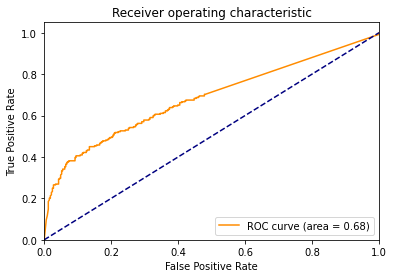

Optimal prediction threshold: 0.99022
Optimal prediction threshold: 0.99684
AUC for MCI vs. CN = 0.62
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.616
AUC for AD vs. CN = 0.888
Acc for MCI vs. CN = 59.3
Acc for AD vs. CN = 66.8
confusion matrix (naive)
[[202 124]
 [  0   0]
 [ 85 102]
 [  5  57]]
oAcc for MCI vs. CN = 67.3
oAcc for AD vs. CN = 87.6
confusion matrix (optimized)
[[282  44]
 [  0   0]
 [124  63]
 [ 14  48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv7.hdf5
Test accuracy: 60.00 %


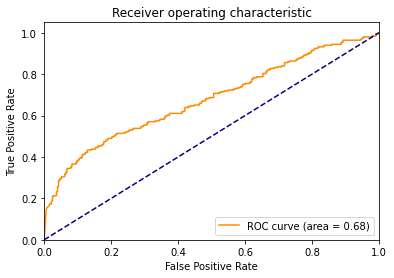

Optimal prediction threshold: 0.96906
Optimal prediction threshold: 0.99417
AUC for MCI vs. CN = 0.61
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.611
AUC for AD vs. CN = 0.876
Acc for MCI vs. CN = 56.3
Acc for AD vs. CN = 63.1
confusion matrix (naive)
[[189 137]
 [  0   0]
 [ 87 100]
 [  6  56]]
oAcc for MCI vs. CN = 64.9
oAcc for AD vs. CN = 83.2
confusion matrix (optimized)
[[255  71]
 [  0   0]
 [109  78]
 [ 13  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv8.hdf5
Test accuracy: 60.17 %


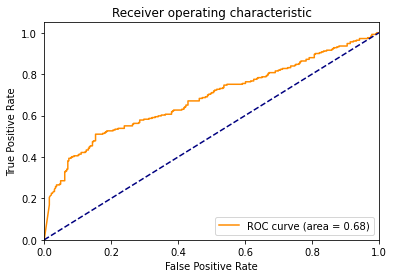

Optimal prediction threshold: 0.99371
Optimal prediction threshold: 0.98951
AUC for MCI vs. CN = 0.62
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.619
AUC for AD vs. CN = 0.878
Acc for MCI vs. CN = 56.3
Acc for AD vs. CN = 60.8
confusion matrix (naive)
[[179 147]
 [  0   0]
 [ 77 110]
 [  5  57]]
oAcc for MCI vs. CN = 68.8
oAcc for AD vs. CN = 81.4
confusion matrix (optimized)
[[276  50]
 [  0   0]
 [110  77]
 [ 13  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv9.hdf5
Test accuracy: 56.00 %


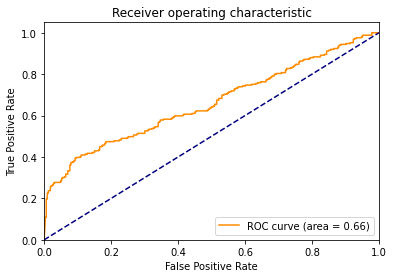

Optimal prediction threshold: 0.98888
Optimal prediction threshold: 0.98503
AUC for MCI vs. CN = 0.59
AUC for AD vs. CN = 0.87
AUC for MCI vs. CN = 0.591
AUC for AD vs. CN = 0.869
Acc for MCI vs. CN = 51.9
Acc for AD vs. CN = 50.8
confusion matrix (naive)
[[141 185]
 [  0   0]
 [ 62 125]
 [  6  56]]
oAcc for MCI vs. CN = 67.4
oAcc for AD vs. CN = 87.4
confusion matrix (optimized)
[[296  30]
 [  0   0]
 [137  50]
 [ 15  47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv10.hdf5
Test accuracy: 61.57 %


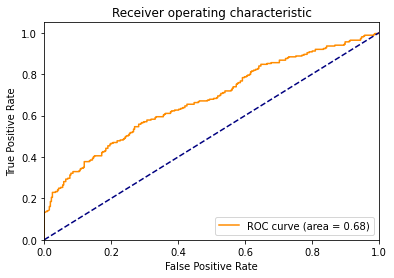

Optimal prediction threshold: 0.72180
Optimal prediction threshold: 0.98714
AUC for MCI vs. CN = 0.60
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.604
AUC for AD vs. CN = 0.893
Acc for MCI vs. CN = 57.9
Acc for AD vs. CN = 65.7
confusion matrix (naive)
[[198 128]
 [  0   0]
 [ 88  99]
 [  5  57]]
oAcc for MCI vs. CN = 62.2
oAcc for AD vs. CN = 85.6
confusion matrix (optimized)
[[231  95]
 [  0   0]
 [ 99  88]
 [ 10  52]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv11.hdf5
Test accuracy: 62.61 %


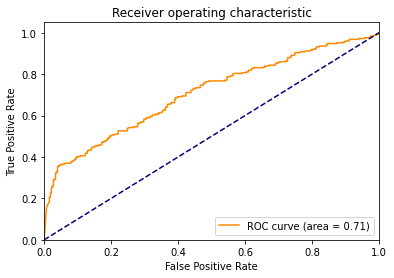

Optimal prediction threshold: 0.34821
Optimal prediction threshold: 0.97973
AUC for MCI vs. CN = 0.64
AUC for AD vs. CN = 0.90
AUC for MCI vs. CN = 0.643
AUC for AD vs. CN = 0.900
Acc for MCI vs. CN = 58.9
Acc for AD vs. CN = 62.1
confusion matrix (naive)
[[183 143]
 [  0   0]
 [ 68 119]
 [  4  58]]
oAcc for MCI vs. CN = 58.3
oAcc for AD vs. CN = 82.7
confusion matrix (optimized)
[[169 157]
 [  0   0]
 [ 57 130]
 [  3  59]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv12.hdf5
Test accuracy: 63.48 %


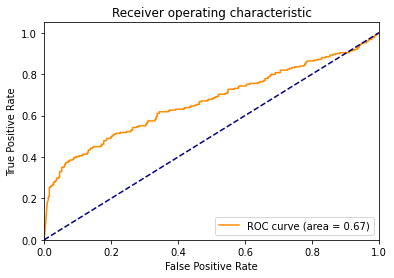

Optimal prediction threshold: 0.96427
Optimal prediction threshold: 0.99213
AUC for MCI vs. CN = 0.60
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.598
AUC for AD vs. CN = 0.882
Acc for MCI vs. CN = 61.0
Acc for AD vs. CN = 71.6
confusion matrix (naive)
[[226 100]
 [  0   0]
 [100  87]
 [ 10  52]]
oAcc for MCI vs. CN = 65.7
oAcc for AD vs. CN = 86.3
confusion matrix (optimized)
[[265  61]
 [  0   0]
 [115  72]
 [ 13  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv13.hdf5
Test accuracy: 59.13 %


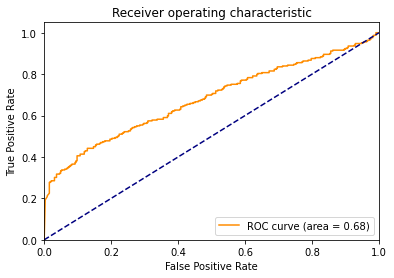

Optimal prediction threshold: 0.99820
Optimal prediction threshold: 0.99931
AUC for MCI vs. CN = 0.61
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.613
AUC for AD vs. CN = 0.879
Acc for MCI vs. CN = 55.4
Acc for AD vs. CN = 57.7
confusion matrix (naive)
[[168 158]
 [  0   0]
 [ 71 116]
 [  6  56]]
oAcc for MCI vs. CN = 67.4
oAcc for AD vs. CN = 86.9
confusion matrix (optimized)
[[284  42]
 [  0   0]
 [125  62]
 [ 15  47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv14.hdf5
Test accuracy: 62.26 %


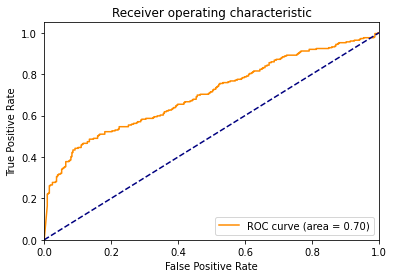

Optimal prediction threshold: 0.99826
Optimal prediction threshold: 0.98431
AUC for MCI vs. CN = 0.63
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.630
AUC for AD vs. CN = 0.926
Acc for MCI vs. CN = 58.3
Acc for AD vs. CN = 66.0
confusion matrix (naive)
[[197 129]
 [  0   0]
 [ 85 102]
 [  3  59]]
oAcc for MCI vs. CN = 69.6
oAcc for AD vs. CN = 84.8
confusion matrix (optimized)
[[298  28]
 [  0   0]
 [128  59]
 [ 14  48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv15.hdf5
Test accuracy: 54.78 %


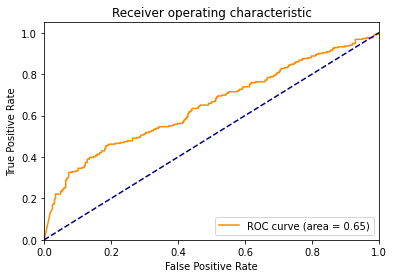

Optimal prediction threshold: 0.99993
Optimal prediction threshold: 0.99951
AUC for MCI vs. CN = 0.59
AUC for AD vs. CN = 0.81
AUC for MCI vs. CN = 0.591
AUC for AD vs. CN = 0.815
Acc for MCI vs. CN = 50.7
Acc for AD vs. CN = 48.7
confusion matrix (naive)
[[134 192]
 [  0   0]
 [ 61 126]
 [  7  55]]
oAcc for MCI vs. CN = 67.8
oAcc for AD vs. CN = 84.0
confusion matrix (optimized)
[[302  24]
 [  0   0]
 [141  46]
 [ 29  33]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv16.hdf5
Test accuracy: 54.09 %


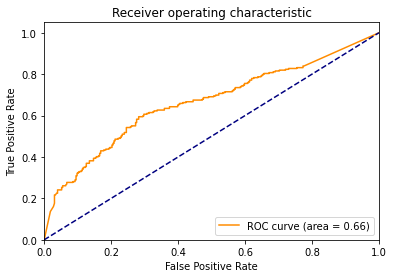

Optimal prediction threshold: 0.98954
Optimal prediction threshold: 0.99851
AUC for MCI vs. CN = 0.59
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.591
AUC for AD vs. CN = 0.880
Acc for MCI vs. CN = 48.9
Acc for AD vs. CN = 44.8
confusion matrix (naive)
[[114 212]
 [  0   0]
 [ 50 137]
 [  2  60]]
oAcc for MCI vs. CN = 63.0
oAcc for AD vs. CN = 78.6
confusion matrix (optimized)
[[229  97]
 [  0   0]
 [ 93  94]
 [  6  56]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv17.hdf5
Test accuracy: 70.26 %


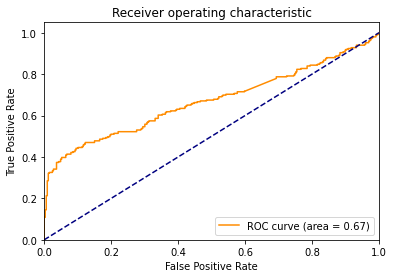

Optimal prediction threshold: 0.41539
Optimal prediction threshold: 0.53316
AUC for MCI vs. CN = 0.60
AUC for AD vs. CN = 0.87
AUC for MCI vs. CN = 0.605
AUC for AD vs. CN = 0.865
Acc for MCI vs. CN = 68.8
Acc for AD vs. CN = 90.5
confusion matrix (naive)
[[300  26]
 [  0   0]
 [134  53]
 [ 11  51]]
oAcc for MCI vs. CN = 68.4
oAcc for AD vs. CN = 91.2
confusion matrix (optimized)
[[286  40]
 [  0   0]
 [122  65]
 [ 11  51]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv18.hdf5
Test accuracy: 63.83 %


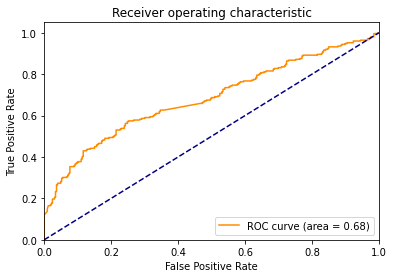

Optimal prediction threshold: 0.69973
Optimal prediction threshold: 0.89686
AUC for MCI vs. CN = 0.62
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.617
AUC for AD vs. CN = 0.879
Acc for MCI vs. CN = 60.8
Acc for AD vs. CN = 69.3
confusion matrix (naive)
[[214 112]
 [  0   0]
 [ 89  98]
 [  7  55]]
oAcc for MCI vs. CN = 64.5
oAcc for AD vs. CN = 82.2
confusion matrix (optimized)
[[244  82]
 [  0   0]
 [100  87]
 [  7  55]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv19.hdf5
Test accuracy: 66.78 %


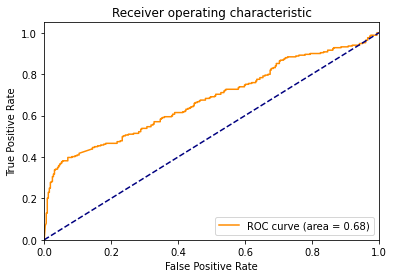

Optimal prediction threshold: 0.90580
Optimal prediction threshold: 0.93688
AUC for MCI vs. CN = 0.62
AUC for AD vs. CN = 0.85
AUC for MCI vs. CN = 0.618
AUC for AD vs. CN = 0.855
Acc for MCI vs. CN = 65.7
Acc for AD vs. CN = 81.7
confusion matrix (naive)
[[270  56]
 [  0   0]
 [120  67]
 [ 15  47]]
oAcc for MCI vs. CN = 69.0
oAcc for AD vs. CN = 91.2
confusion matrix (optimized)
[[303  23]
 [  0   0]
 [136  51]
 [ 15  47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv20.hdf5
Test accuracy: 65.04 %


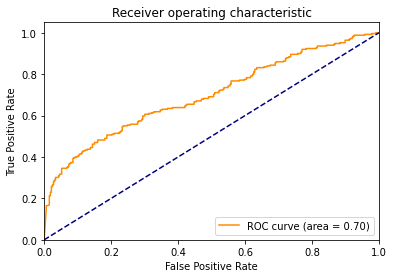

Optimal prediction threshold: 0.36475
Optimal prediction threshold: 0.99513
AUC for MCI vs. CN = 0.63
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.628
AUC for AD vs. CN = 0.910
Acc for MCI vs. CN = 62.2
Acc for AD vs. CN = 73.7
confusion matrix (naive)
[[231  95]
 [  0   0]
 [ 99  88]
 [  7  55]]
oAcc for MCI vs. CN = 63.0
oAcc for AD vs. CN = 87.9
confusion matrix (optimized)
[[228  98]
 [  0   0]
 [ 92  95]
 [  7  55]]


In [6]:
# Split data into training/validation and holdout test data
from sklearn.model_selection import StratifiedKFold,train_test_split
import numpy as np
import gc
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # model will be trained on GPU 0

import keras
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.optimizers import Adam
from keras import initializers
from keras.callbacks import EarlyStopping
import tensorflow as tf
from statistics import mean,stdev
from sklearn.metrics import confusion_matrix

acc_test, auc_test, auc_AD, auc_MCI = [], [], [], []
acc_AD, acc_MCI, opt_acc_AD, opt_acc_MCI = [], [], [], []

num_kfold = 20 # number of cross-validation loops equal to number of models
batch_size = 8

for k in range(num_kfold):
    gc.collect()
    print('validating model newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    mymodel = models.load_model('newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    
    # Calculate accuracy for validation data
    #scores = mymodel.evaluate(images, labels, batch_size=batch_size) #, verbose=0
    #print("Test %s: %.2f%%" % (mymodel.metrics_names[1], scores[1]*100))
    #acc_test.append(scores[1]*100)
    
    # calculate area under the curve
    # AUC as optimization function during training: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
    pred = mymodel.predict(images, batch_size=batch_size)
    acc_all = np.mean((labels[:, 1] == np.round(pred[:, 1])).astype(int))*100
    print("Test accuracy: %.2f %%" % acc_all)
    acc_test.append(acc_all)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    acc = dict()
    opt_acc = dict()
    thresh = dict()
    for i in range(2): # classes dummy vector: 0 - CN, 1 - MCI/AD
        fpr[i], tpr[i], _ = roc_curve(labels[:, i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    auc_test.append(roc_auc[1])
    
    # redo AUC for binary comparison: AD vs. HC and MCI vs. HC
    for i in [3,4]:
      grpi = np.equal(grps.Group.to_numpy(dtype=np.int), np.ones((grps.shape[0],), dtype=np.int)*i)
      grp1 = np.equal(grps.Group.to_numpy(dtype=np.int), np.ones((grps.shape[0],), dtype=np.int))
      grpidx = np.logical_or(grpi, grp1)
      fpr[i], tpr[i], thresholds = roc_curve(labels[grpidx, 1], pred[grpidx, 1])
      roc_auc[i] = auc(fpr[i], tpr[i])
      thresh[i] = thresholds[np.argmax(tpr[i] - fpr[i])]
      print('Optimal prediction threshold: %0.5f' % thresh[i])
      acc[i] = np.mean((labels[grpidx, 1] == np.round(pred[grpidx, 1])).astype(int))*100
      opt_acc[i] = np.mean((labels[grpidx, 1] == (pred[grpidx, 1]>thresh[i]).astype(int)).astype(int))*100

    print('AUC for MCI vs. CN = %0.2f' % roc_auc[3])
    print('AUC for AD vs. CN = %0.2f' % roc_auc[4])
    auc_AD.append(roc_auc[4])
    auc_MCI.append(roc_auc[3])
    acc_AD.append(acc[4])
    acc_MCI.append(acc[3])
    opt_acc_AD.append(opt_acc[4])
    opt_acc_MCI.append(opt_acc[3])
    
    print('AUC for MCI vs. CN = %0.3f' % roc_auc[3])
    print('AUC for AD vs. CN = %0.3f' % roc_auc[4])
    print('Acc for MCI vs. CN = %0.1f' % acc[3])
    print('Acc for AD vs. CN = %0.1f' % acc[4])
    print('confusion matrix (naive)')
    confmat = confusion_matrix(grps.Group-1, np.round(pred[:, 1]))
    print(confmat[:,(0,1)])
    print('oAcc for MCI vs. CN = %0.1f' % opt_acc[3])
    print('oAcc for AD vs. CN = %0.1f' % opt_acc[4])
    print('confusion matrix (optimized)')
    confmat = confusion_matrix(grps.Group-1, (pred[:, 1]>thresh[3]).astype(int)) ## use MCI threshold
    print(confmat[:,(0,1)])

In [7]:
# print model performance summary
from statistics import mean,stdev
print('Acc for all test data = %0.1f +/- %0.1f' % (mean(acc_test), stdev(acc_test)))
print('AUC for all test data = %0.3f +/- %0.3f' % (mean(auc_test), stdev(auc_test)))
print('AUC for MCI vs. CN = %0.3f +/- %0.3f' % (mean(auc_MCI), stdev(auc_MCI)))
print('AUC for AD vs. CN = %0.3f +/- %0.3f' % (mean(auc_AD), stdev(auc_AD)))
print('Mean Acc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(acc_MCI), stdev(acc_MCI)))
print('Mean Acc for AD vs. CN = %0.1f +/- %0.1f' % (mean(acc_AD), stdev(acc_AD)))
print('Mean oAcc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_MCI), stdev(opt_acc_MCI)))
print('Mean oAcc for AD vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_AD), stdev(opt_acc_AD)))

Acc for all test data = 62.1 +/- 4.3
AUC for all test data = 0.676 +/- 0.017
AUC for MCI vs. CN = 0.609 +/- 0.017
AUC for AD vs. CN = 0.879 +/- 0.024
Mean Acc for MCI vs. CN = 58.8 +/- 5.2
Mean Acc for AD vs. CN = 66.6 +/- 11.7
Mean oAcc for MCI vs. CN = 65.9 +/- 2.9
Mean oAcc for AD vs. CN = 85.6 +/- 3.3


In [8]:
results = pd.DataFrame({'Accuracy_Test':acc_test, 'AUC_Test':auc_test, 'AUC_MCI':auc_MCI, 'AUC_AD':auc_AD,
                        'Acc_MCI':acc_MCI, 'Acc_AD':acc_AD,
                        'Opt_acc_MCI':opt_acc_MCI, 'Opt_acc_AD':opt_acc_AD})
print(results)

    Accuracy_Test  AUC_Test   AUC_MCI    AUC_AD    Acc_MCI     Acc_AD  \
0       61.217391  0.654107  0.590967  0.844548  58.284600  67.525773   
1       70.608696  0.702300  0.634690  0.906219  69.395712  89.690722   
2       60.695652  0.650639  0.572635  0.885909  57.309942  67.010309   
3       63.130435  0.674871  0.607264  0.878785  59.649123  67.525773   
4       62.956522  0.667732  0.603589  0.861196  59.844055  67.783505   
5       62.782609  0.683716  0.616007  0.887938  59.259259  66.752577   
6       60.000000  0.676885  0.610840  0.876088  56.335283  63.144330   
7       60.173913  0.683273  0.618853  0.877573  56.335283  60.824742   
8       56.000000  0.659823  0.590548  0.868766  51.851852  50.773196   
9       61.565217  0.676005  0.604065  0.892984  57.894737  65.721649   
10      62.608696  0.707148  0.643056  0.900455  58.869396  62.113402   
11      63.478261  0.668736  0.597979  0.882149  61.013645  71.649485   
12      59.130435  0.678986  0.612718  0.878859  55